In [12]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from matplotlib import pyplot as plt

In [13]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the class labels to one-hot encoded vectors
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Epoch 1/10
782/782 [==============================] - 50s 63ms/step - loss: 1.5641 - accuracy: 0.4286 - val_loss: 1.3151 - val_accuracy: 0.5294
Epoch 2/10
782/782 [==============================] - 53s 68ms/step - loss: 1.2147 - accuracy: 0.5704 - val_loss: 1.1326 - val_accuracy: 0.5976
Epoch 3/10
782/782 [==============================] - 51s 65ms/step - loss: 1.0677 - accuracy: 0.6255 - val_loss: 1.0208 - val_accuracy: 0.6394
Epoch 4/10
782/782 [==============================] - 49s 63ms/step - loss: 0.9747 - accuracy: 0.6575 - val_loss: 0.9775 - val_accuracy: 0.6587
Epoch 5/10
782/782 [==============================] - 49s 63ms/step - loss: 0.9024 - accuracy: 0.6848 - val_loss: 0.9431 - val_accuracy: 0.6718
Epoch 6/10
782/782 [==============================] - 55s 70ms/step - loss: 0.8428 - accuracy: 0.7046 - val_loss: 0.9121 - val_accuracy: 0.6838
Epoch 7/10
782/782 [==============================] - 52s 66ms/step - loss: 0.8005 - accuracy: 0.7193 - val_loss: 0.9328 - val_accuracy:

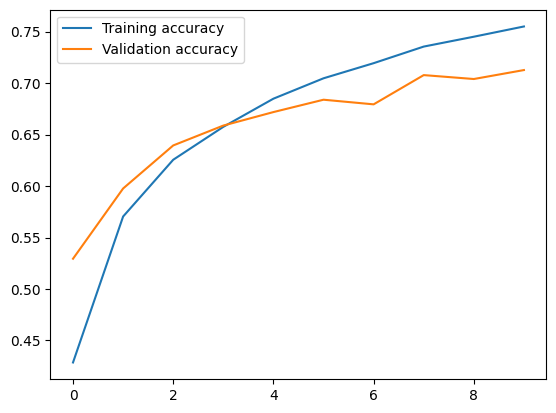

In [14]:
history = model.fit(x_train, y_train,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test))


# Evaluate the model on the test set
loss, accuracy = model.evaluate(x_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

# Visualize the training progress
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.legend()
plt.show()

1/1 [==============================] - 0s 48ms/step


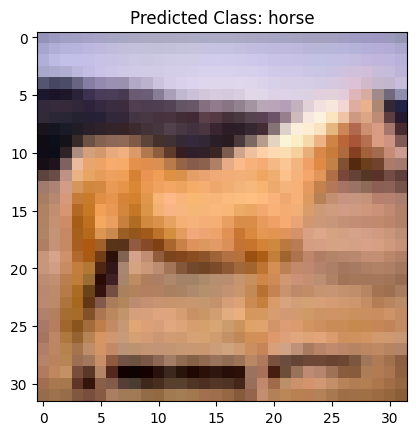

In [18]:
image_index = 700
new_image = x_test[image_index]

# Reshape the image to match the input shape of the model
new_image = new_image.reshape(1, 32, 32, 3)

# Use the model to predict the class label
predicted_class = model.predict(new_image)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
class_index = predicted_class.argmax(axis=-1)[0]
class_name = class_names[class_index]

# Plot the image and the predicted class label
plt.imshow(x_test[image_index])
plt.title(f"Predicted Class: {class_name}")
plt.show()